## Sections
1. Loading Training Dataset
2. Loading Validation Dataset
3. Freezing Layers of the Base Model
4. Adding Layers to the Neural Network Model
5. Compiling the Neural Network Model
6. Training the Model and Validation
7. Loading Testing Dataset
8. Predicting on Testing Dataset
9. Evaluating Model Performance on Testing Dataset
10. Generating Classification Report


In [26]:
import numpy as np  # Used for numerical operations.
import pandas as pd  # Used for data manipulation and analysis.
import matplotlib.pyplot as plt  # Used for creating static, animated, and interactive visualizations in Python.
import seaborn as sns  # Used for data visualization based on Matplotlib.
import os  # Used for interacting with the operating system.
import PIL  # Used for opening, manipulating, and saving many different image file formats.
import tensorflow as tf  # A library for machine learning and neural networks.

from tensorflow.keras.models import Sequential, Model  # Tools to build neural networks.
from tensorflow.keras.applications import ResNet50  # A pre-trained model for image recognition.
from tensorflow.keras.optimizers import Adam  # An optimizer for machine learning models.
from sklearn.metrics import classification_report, confusion_matrix  # Tools for evaluating the performance of machine learning models.

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array  # Tools for loading and preprocessing images.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten  # Different types of layers to use in neural networks.


In [27]:
# Directory locations for the training, testing, and validation datasets
training_directory = 'train'
testing_directory = 'test'
validation_directory = 'valid'

In [28]:
# Desired height and width of the images (in pixels) that will be used by the model
image_height = 224
image_width = 224

In [29]:
# The batch size defines the number of samples that will be propagated through the network
batch_size_training = 32

### 1. Loading Training Dataset
This code loads training images from a specified directory for training a machine learning model.

1. **Directory:** Looks in the `training_directory` for images.
2. **Seed:** It uses a seed value of 123 to ensure the shuffle is the same each time.
3. **Shuffle:** It shuffles the images to help the model generalize better.
4. **Image Size:** It resizes all images to the same height and width to fit the model.
5. **Batch Size:** It loads images in batches for efficient training.

In [30]:
# Loading the training dataset from the 'training_directory' directory
# Images are shuffled and resized to the defined dimensions, and they're loaded in batches as per defined batch size
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  training_directory,
  seed=123,  # Seed for reproducibility
  shuffle=True,  # Shuffle the data
  image_size=(image_height, image_width),  # Resize the images
  batch_size=batch_size_training)  # Load in batches

Found 12594 files belonging to 100 classes.


### 2. Loading Validation Dataset
This code loads validation images from a specified directory for validating a machine learning model.

1. **Directory:** Looks in the `validation_directory` for images.
2. **Shuffle:** It does not shuffle the images. This is standard for validation and test data.
3. **Seed:** Uses a seed value of 123 for consistent random operations.
4. **Image Size:** Makes all images the same size to match the model's requirements.
5. **Batch Size:** Loads images in batches for efficient validation.

In [31]:
# Loading the validation dataset from the 'validation_directory' directory
# Images are not shuffled (order is preserved), resized to the defined dimensions, and they're loaded in batches as per defined batch size
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  validation_directory,
  shuffle=False,  # Do not shuffle the data
  seed=1,  # Seed for reproducibility
  image_size=(image_height, image_width),  # Resize the images
  batch_size=batch_size_training)  # Load in batches

Found 500 files belonging to 100 classes.


In [32]:
# Retrieve the class names from the training dataset
class_names_in_training_dataset = training_dataset.class_names

In [33]:
# Print out each class name on a new line
for class_name in class_names_in_training_dataset:
    print(class_name)

ADONIS
AFRICAN GIANT SWALLOWTAIL
AMERICAN SNOOT
AN 88
APPOLLO
ARCIGERA FLOWER MOTH
ATALA
ATLAS MOTH
BANDED ORANGE HELICONIAN
BANDED PEACOCK
BANDED TIGER MOTH
BECKERS WHITE
BIRD CHERRY ERMINE MOTH
BLACK HAIRSTREAK
BLUE MORPHO
BLUE SPOTTED CROW
BROOKES BIRDWING
BROWN ARGUS
BROWN SIPROETA
CABBAGE WHITE
CAIRNS BIRDWING
CHALK HILL BLUE
CHECQUERED SKIPPER
CHESTNUT
CINNABAR MOTH
CLEARWING MOTH
CLEOPATRA
CLODIUS PARNASSIAN
CLOUDED SULPHUR
COMET MOTH
COMMON BANDED AWL
COMMON WOOD-NYMPH
COPPER TAIL
CRECENT
CRIMSON PATCH
DANAID EGGFLY
EASTERN COMA
EASTERN DAPPLE WHITE
EASTERN PINE ELFIN
ELBOWED PIERROT
EMPEROR GUM MOTH
GARDEN TIGER MOTH
GIANT LEOPARD MOTH
GLITTERING SAPPHIRE
GOLD BANDED
GREAT EGGFLY
GREAT JAY
GREEN CELLED CATTLEHEART
GREEN HAIRSTREAK
GREY HAIRSTREAK
HERCULES MOTH
HUMMING BIRD HAWK MOTH
INDRA SWALLOW
IO MOTH
Iphiclus sister
JULIA
LARGE MARBLE
LUNA MOTH
MADAGASCAN SUNSET MOTH
MALACHITE
MANGROVE SKIPPER
MESTRA
METALMARK
MILBERTS TORTOISESHELL
MONARCH
MOURNING CLOAK
OLEANDER HAWK MOT

In [68]:
# Get the length of 'class_names_in_training_dataset'
number_of_classes = len(class_names_in_training_dataset)

In [35]:
# Create a figure of size 10x10 for displaying images
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

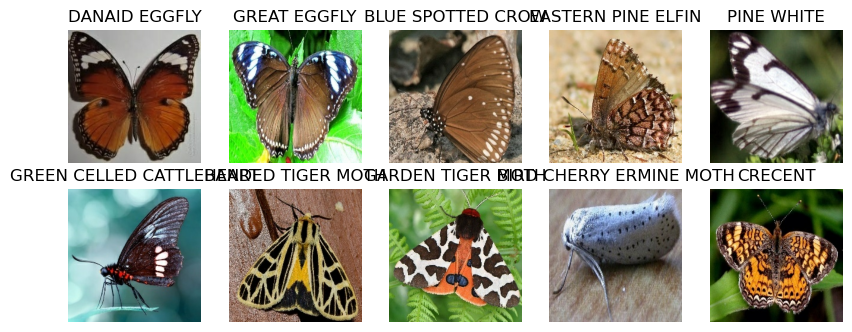

In [75]:
# Take one batch of images and labels from 'training_dataset' and display some of them
plt.figure(figsize=(10, 10))
for images, labels in training_dataset.take(1):
  for i in range(10):
    # Create a subplot for each image
    ax = plt.subplot(5, 5, i + 1)
    # Show the image
    plt.imshow(images[i].numpy().astype("uint8"))
    # Set the title of the plot to the class name of the image
    plt.title(class_names_in_training_dataset[labels[i]])
    # Remove the axes for clarity
    plt.axis("off")

This line of code creates a new Sequential model in TensorFlow.

- **Sequential Model:** This is a model type that allows you to add layers one at a time in order. 
- **Why use it:** It's a simple way to build a neural network, as each layer you add will automatically connect to the previous layer.

So by running `neural_network_model = Sequential()`, you're starting a new neural network model that you can easily add layers to.

In [37]:
# Initialize a Sequential model
neural_network_model = Sequential()

This line of code loads a pre-trained model called ResNet50 from TensorFlow's model library.

- **ResNet50 Model:** This is a model pre-trained on the ImageNet dataset, a large dataset of 1.4M images and 1000 classes. It's often used as a starting point for image classification tasks.
- **Parameters:** `include_top=False` means we don't include the final dense layer of the model. `input_shape` sets the shape of image inputs to the model. `pooling='avg'` applies global average pooling to the output of the last convolutional layer. `weights='imagenet'` means we want to load weights pre-trained on ImageNet.

So by running this code, we're getting a ready-made, powerful image classification model to use as a base for your own model.

In [38]:
# Load the ResNet50 model as a base model
base_model_resnet = tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=100,
                   weights='imagenet')

In [39]:
# Show the summary of the base model
base_model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

### 3. Freezing Layers of the Base Model
This code is used to freeze the layers of a pre-trained base model, specifically ResNet50.

- **Freezing Layers:** By setting `layer.trainable=False` for each layer in the base model, we prevent the weights of those layers from being updated during training.
- **Preserving Learned Features:** Freezing the base model allows us to retain the knowledge and useful features it learned from its original training on a large dataset (e.g., ImageNet).
- **Adding New Layers:** With the base model frozen, we can add and train new layers on top of it. These new layers can specialize in learning features specific to our own dataset.
- **Why Freeze Layers:** Freezing the base model is typically done when using a pre-trained model. It helps leverage the valuable knowledge already encoded in the base model's weights, while allowing us to fine-tune and train additional layers for our specific task.

In summary, by freezing the layers of the base model, we preserve its learned features while training new layers on top, enabling us to build a model that learns task-specific features on our own dataset.

In [40]:
# Freeze the layers in the base model so that they are not trainable during model fitting
for layer in base_model_resnet.layers:
        layer.trainable=False

### 4. Adding Layers to the Neural Network Model
This code adds layers to a neural network model called `neural_network_model`.

1. **Add Base Model:** The base model (ResNet50) is added as the first layer of `neural_network_model`. This allows us to leverage the pre-trained features learned by the base model.
2. **Flatten Layer:** The output of the base model, which is a 3D tensor, is flattened into a 1D tensor. This is necessary to connect it to the fully connected layers that follow.
3. **Dense Layer:** A dense layer with 512 units and a 'relu' activation function is added. This layer learns complex patterns and representations based on the flattened input.
4. **Dropout Layer:** A dropout layer with a dropout rate of 50% is added. It randomly sets half of the inputs to 0 during training, which helps prevent overfitting by reducing reliance on specific features.
5. **Output Layer:** An output layer with 100 units (representing 100 classes) and a 'softmax' activation function is added. This layer provides the final predictions for the classification task.
6. **Summary:** The summary of the model is printed, displaying the layers, output shapes, and number of parameters.

In summary, this code constructs a neural network model by adding layers, including a base model for feature extraction, fully connected layers for learning complex patterns, and an output layer for classification.


This can also be done manually through through `keras.models.Sequential` which is added as comments. This version of the implementation can be seen in file **butterfly_without_builtin_functions**. Doing it manually resultet in a bad end result.

In [41]:
# Add the base model as the first layer of 'neural_network_model'
neural_network_model.add(base_model_resnet)

# Flatten the 3D output to 1D tensor
neural_network_model.add(Flatten())

# Add a dense layer with 512 units and a 'relu' activation function
neural_network_model.add(Dense(512, activation='relu'))

# Add a dropout layer with dropout rate of 50% to prevent overfitting
neural_network_model.add(Dropout(0.5)) 

# Add an output layer with 100 units (representing 100 classes) and a 'softmax' activation function
neural_network_model.add(Dense(100, activation='softmax'))

# Show the summary of the model
neural_network_model.summary()



# If I were to build the model architecture without built-in functions.
#model = keras.models.Sequential([
#    base_model,
#    keras.layers.GlobalAveragePooling2D(),
#    keras.layers.Dense(512, activation='relu'),
#    keras.layers.Dropout(0.5),
#    keras.layers.Dense(len(class_names), activation='softmax')
#])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               51300     
                                                                 
Total params: 24,688,100
Trainable params: 1,100,388
Non-trainable params: 23,587,712
_________________________________________________________________


### 5. Compiling the Neural Network Model

This code compiles the neural network model, configuring its training settings.

- **Compile Model:** The `neural_network_model` is compiled with the following settings:
   - **Optimizer:** The Adam optimizer is used with a learning rate of 0.0001. The optimizer adjusts the weights of the model during training to minimize the loss.
   - **Loss Function:** The loss function is set to 'sparse_categorical_crossentropy'. This is appropriate for multi-class classification tasks with integer labels.
   - **Metrics:** The model's performance is evaluated using the 'accuracy' metric, which measures the proportion of correctly classified samples.

By calling `neural_network_model.compile(...)`, you configure the training process of the model with the specified optimizer, loss function, and evaluation metrics.

In [42]:
# Compile the model with the Adam optimizer, the sparse categorical cross entropy loss function, and a metric of accuracy
neural_network_model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

This code fits (trains) the neural network model on the training data for a specified number of epochs, while also validating it against the validation data.

- **Fit Model:** The `neural_network_model` is trained using the `fit` function with the following settings:
   - **Training Data:** The `training_dataset` is provided as the input data for training the model.
   - **Epochs:** The model is trained for 10 epochs, which means it will go through the entire training dataset 10 times.
   - **Validation Data:** The `validation_dataset` is used for validation, allowing the model's performance to be evaluated on unseen data during training.

By calling `neural_network_model.fit(...)`, you initiate the training process of the model, where it learns from the training data and validates its performance on the validation data.

In [50]:
# Fit the model to the training data for 10 epochs, validating against the validation data
training_history = neural_network_model.fit(training_dataset,
                    epochs=10,
                    validation_data=validation_dataset,
                   )

Epoch 1/10
394/394 [==============================] - 390s 989ms/step - loss: 1.6748 - accuracy: 0.5895 - val_loss: 0.9062 - val_accuracy: 0.8200
Epoch 2/10
394/394 [==============================] - 390s 990ms/step - loss: 1.1062 - accuracy: 0.7180 - val_loss: 0.6395 - val_accuracy: 0.8740
Epoch 3/10
394/394 [==============================] - 387s 982ms/step - loss: 0.8371 - accuracy: 0.7835 - val_loss: 0.5121 - val_accuracy: 0.8940
Epoch 4/10
394/394 [==============================] - 389s 988ms/step - loss: 0.6945 - accuracy: 0.8161 - val_loss: 0.4368 - val_accuracy: 0.9080
Epoch 5/10
394/394 [==============================] - 400s 1s/step - loss: 0.5874 - accuracy: 0.8452 - val_loss: 0.3847 - val_accuracy: 0.9140
Epoch 6/10
394/394 [==============================] - 404s 1s/step - loss: 0.5100 - accuracy: 0.8655 - val_loss: 0.3545 - val_accuracy: 0.9180
Epoch 7/10
394/394 [==============================] - 392s 996ms/step - loss: 0.4412 - accuracy: 0.8799 - val_loss: 0.3286 - val_a

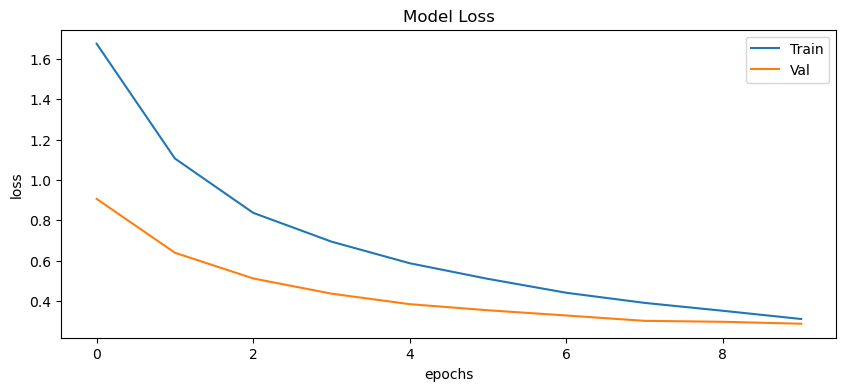

In [52]:
# Create a figure of size 10x4 for displaying the loss plot
plt.figure(figsize=(10,4))

# Plot the training loss
plt.plot(training_history.history['loss'])

# Plot the validation loss
plt.plot(training_history.history['val_loss'])

# Set the title of the plot
plt.title('Model Loss')

# Label the y-axis as 'loss'
plt.ylabel('loss')

# Label the x-axis as 'epochs'
plt.xlabel('epochs')

# Set the legend to differentiate between training and validation loss. Place the legend in the upper right corner.
plt.legend(['Train','Val'], loc= 'upper right')

# Show the plot
plt.show()

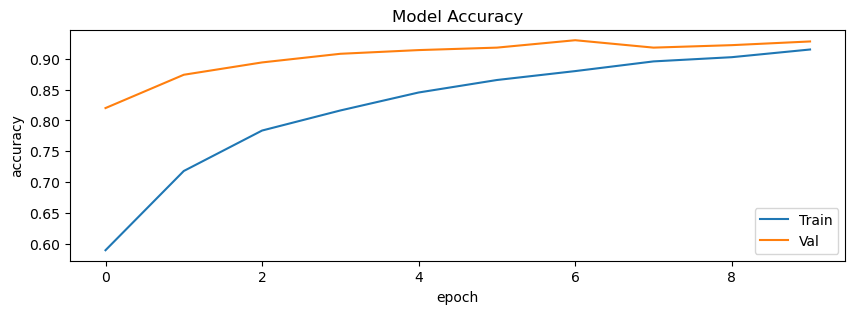

In [53]:
# Create a figure of size 10x3 for displaying the accuracy plot
plt.figure(figsize=(10,3))

# Plot the training accuracy
plt.plot(training_history.history['accuracy'])

# Plot the validation accuracy
plt.plot(training_history.history['val_accuracy'])

# Set the title of the plot
plt.title('Model Accuracy')

# Label the y-axis as 'accuracy'
plt.ylabel('accuracy')

# Label the x-axis as 'epoch'
plt.xlabel('epoch')

# Set the legend to differentiate between training and validation accuracy. Place the legend in the lower right corner.
plt.legend(['Train', 'Val'], loc='lower right')

# Show the plot
plt.show()

### 7. Loading Testing Dataset

This code loads the testing dataset from a specified directory and prepares it for evaluation.

- **Load Testing Dataset:** The `testing_dataset` is loaded using the `image_dataset_from_directory` function with the following settings:
   - **Directory:** The `testing_directory` is the directory where the testing images are stored.
   - **Seed:** A seed value of 123 is used for reproducibility, ensuring consistent results when loading the data.
   - **Image Size:** All images are resized to the specified `image_height` and `image_width`.
   - **Shuffle:** The data is not shuffled, preserving the original order of the images.

In [54]:
# Loading the testing dataset from the 'testing_directory' directory
# Images are not shuffled (order is preserved), resized to the defined dimensions
testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    testing_directory, 
    seed = 123,  # Seed for reproducibility
    image_size = (image_height, image_width),  # Resize the images
    shuffle = False  # Do not shuffle the data
)

Found 500 files belonging to 100 classes.


### 8. Predicting on Testing Dataset

This code performs predictions on the testing dataset using a trained model.

- **Unpack Testing Dataset:** The `testing_dataset` is unpacked into two separate variables, `testing_images` and `testing_labels`. This allows easy access to the individual images and their corresponding labels.

- **Model Predictions:** The trained `neural_network_model` is used to predict the labels of the testing images. The predictions are stored in the `model_predictions` variable.

- **Convert to Probabilities:** The predicted scores are converted into probabilities using the softmax function. This ensures that the prediction scores represent probabilities for each class.

By executing this code, we obtain the model's predictions and probability scores for the testing dataset.

In [55]:
# Unpack the images and labels from the testing dataset into two separate variables
testing_images, testing_labels = tuple(zip(*testing_dataset))

# Use the trained model to predict the labels of the testing images
model_predictions = neural_network_model.predict(testing_dataset)

# Convert the model predictions into probabilities with the softmax function
prediction_scores = tf.nn.softmax(model_predictions)

16/16 [==============================] - 14s 881ms/step


### 9. Evaluating Model Performance on Testing Dataset
This code evaluates the performance of the model on the testing dataset.

- **Evaluate Model:** The `neural_network_model` is evaluated on the `testing_dataset` using the `evaluate` function. This computes the loss and accuracy of the model on the testing dataset.

- **Evaluation Results:** The evaluation results are stored in the `evaluation_results` variable, which typically contains the loss and accuracy values.

- **Print Results:** The loss and accuracy of the model on the testing dataset are printed using `print("Testing Loss, Test Accuracy:", evaluation_results)`. This provides a summary of the model's performance on unseen testing data.

In [59]:
# Evaluate the model on the testing dataset
evaluation_results = neural_network_model.evaluate(testing_dataset)

# Print the loss and accuracy of the model on the testing dataset
print("Testing Loss, Test Accuracy:", evaluation_results)

16/16 [==============================] - 14s 866ms/step - loss: 0.2488 - accuracy: 0.9360
Testing Loss, Test Accuracy: [0.24884413182735443, 0.9359999895095825]


### 10. Generating Classification Report

This code compares the true labels with the predicted classes and generates a classification report.

- **Concatenate Test Labels:** The individual test labels from `testing_labels` are concatenated into a single numpy array called `testing_labels_concatenated`. This allows for easy comparison with the predicted classes.

- **Create Predicted Classes:** The `prediction_scores` are used to create a predicted class array. For each test image, the class with the highest probability is selected using `np.argmax()`. The resulting predicted classes are stored in the `predicted_classes` array.

- **Classification Report:** The `classification_report()` function is used to generate a report comparing the true labels (`testing_labels_concatenated`) and the predicted classes (`predicted_classes`). The `target_names` parameter specifies the class names used during training.

By executing this code, you obtain a classification report that provides metrics such as precision, recall, and F1-score, comparing the model's predictions with the true labels of the testing dataset.

In [57]:
# Concatenate all test labels into a single numpy array
testing_labels_concatenated = np.concatenate(testing_labels)

# Create a prediction array by selecting the class with highest probability for each test image
predicted_classes = np.array([np.argmax(prediction) for prediction in prediction_scores])

# Print the classification report comparing the true labels and the predicted classes
print(classification_report(testing_labels_concatenated, predicted_classes, target_names=class_names_in_training_dataset, zero_division='warn'))

                           precision    recall  f1-score   support

                   ADONIS       0.62      1.00      0.77         5
AFRICAN GIANT SWALLOWTAIL       1.00      1.00      1.00         5
           AMERICAN SNOOT       1.00      0.40      0.57         5
                    AN 88       1.00      0.80      0.89         5
                  APPOLLO       0.83      1.00      0.91         5
     ARCIGERA FLOWER MOTH       0.83      1.00      0.91         5
                    ATALA       1.00      1.00      1.00         5
               ATLAS MOTH       1.00      1.00      1.00         5
 BANDED ORANGE HELICONIAN       1.00      1.00      1.00         5
           BANDED PEACOCK       1.00      1.00      1.00         5
        BANDED TIGER MOTH       1.00      0.80      0.89         5
            BECKERS WHITE       1.00      0.80      0.89         5
  BIRD CHERRY ERMINE MOTH       1.00      1.00      1.00         5
         BLACK HAIRSTREAK       1.00      1.00      1.00     